# k-Means

데이터들을 비슷한 것끼리 **k개의 그룹(클러스터)**으로 나누는 알고리즘

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Wholesale customers 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# 데이터 전처리
# 분석에 사용할 속성을 선택
X = df.iloc[:,:] # 행과 열 전체
print(X[:5]) # 앞에서 5개의 행 출력

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [7]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X_std = preprocessing.StandardScaler().fit_transform(X)

X_std[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

# 모델학습 및 검증

In [10]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

#n_init=10: 중심점을 랜덤하게 뽑아서 군집을 시도할 횟수
# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)

# 모형 학습
kmeans.fit(X_std)

# 예측(군집)
# .labels_:각 데이터가 어느 군집에 속했는지 알려주는 라벨(번호)
cluster_label = kmeans.labels_
print(cluster_label)

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 3 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 3 1 1 2 2 1 1 2 2 3 1 2 2 1 3 1 1 2 3 2 1 2 2 2 2 2 1
 1 2 2 1 2 2 2 1 1 2 1 3 3 2 2 2 2 2 3 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 3 2 4 2
 2 2 2 1 1 2 2 2 1 2 2 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 3 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 1 0
 3 0 1 0 0 0 0 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


In [11]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


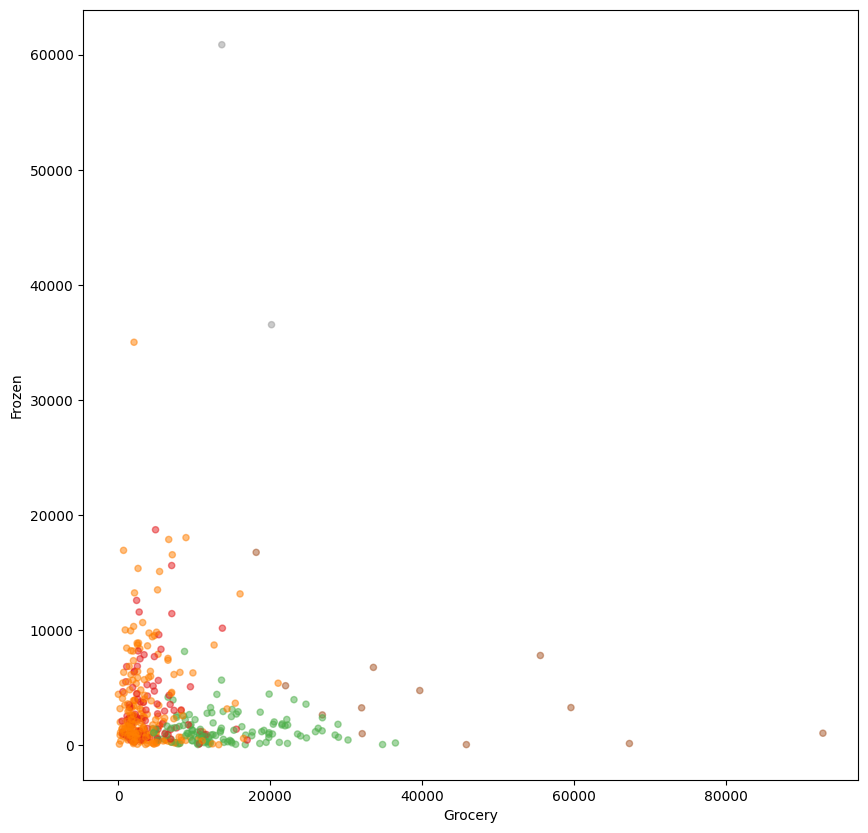

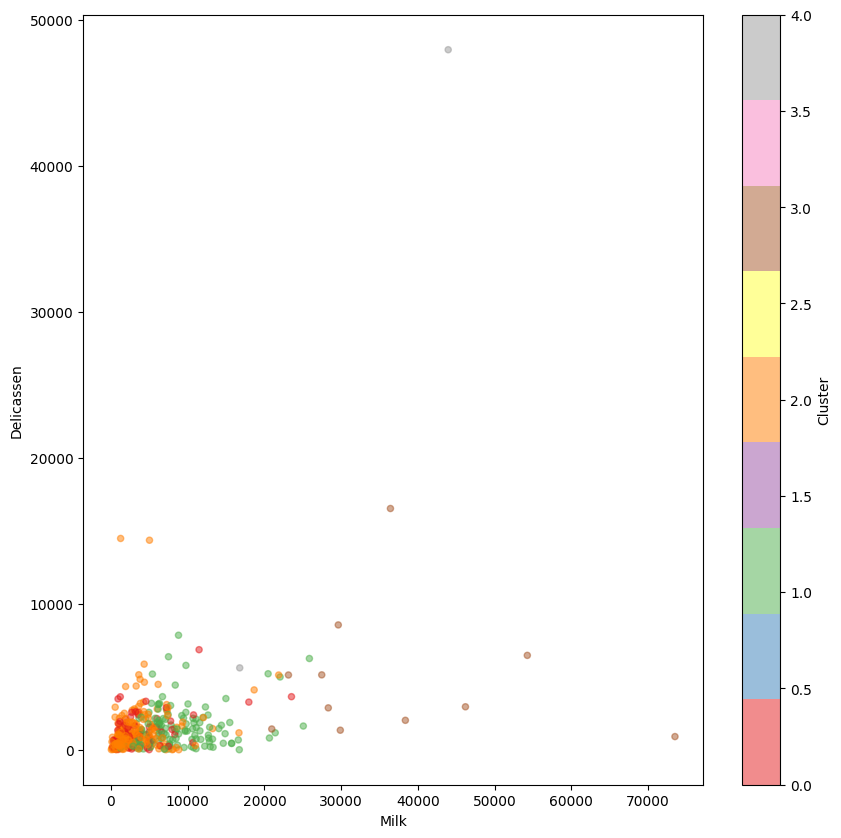

In [12]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',
        colorbar=False,alpha=0.5,figsize=(10,10));
df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',
        colorbar=True, alpha=0.5, figsize=(10,10));